<a href="https://colab.research.google.com/github/tanvir0188/plant-and-crop-pest-detection/blob/main/Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.layers import LeakyReLU
# splitfolders needs to be installed with ! since it's a shell command
!pip install split-folders
import splitfolders
from keras.layers import*
from keras.models import*
from keras.preprocessing import image
# Try using tf.keras.preprocessing.image.ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahsanabir","key":"f74a2c997da32a110b52febef4c4ba80"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashenafifasilkebede/dataset

Dataset URL: https://www.kaggle.com/datasets/ashenafifasilkebede/dataset
License(s): CC0-1.0
100% 2.93G/2.93G [02:46<00:00, 7.20MB/s]
100% 2.93G/2.93G [02:46<00:00, 18.9MB/s]


In [ ]:
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Normal/Normal_100x_85.jpg  
  inflating: train/Normal/Normal_100x_86.jpg  
  inflating: train/Normal/Normal_100x_87.jpg  
  inflating: train/Normal/Normal_100x_89.jpg  
  inflating: train/Normal/Normal_100x_9.jpg  
  inflating: train/Normal/Normal_400x_1.jpg  
  inflating: train/Normal/Normal_400x_100.jpg  
  inflating: train/Normal/Normal_400x_101.jpg  
  inflating: train/Normal/Normal_400x_102.jpg  
  inflating: train/Normal/Normal_400x_103.jpg  
  inflating: train/Normal/Normal_400x_107.jpg  
  inflating: train/Normal/Normal_400x_108.jpg  
  inflating: train/Normal/Normal_400x_109.jpg  
  inflating: train/Normal/Normal_400x_11.jpg  
  inflating: train/Normal/Normal_400x_110.jpg  
  inflating: train/Normal/Normal_400x_111.jpg  
  inflating: train/Normal/Normal_400x_112.jpg  
  inflating: train/Normal/Normal_400x_113.jpg  
  inflating: train/Normal/Normal_400x_114.jpg  
  inflating: train/Normal/Normal_400x_115.jpg 

In [ ]:
!ls

dataset.zip  sample_data  test	train  val


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerators with rescaling (normalizing the pixel values)
train_gen = ImageDataGenerator(rescale=1/255)
val_gen = ImageDataGenerator(rescale=1/255)
test_gen = ImageDataGenerator(rescale=1/255)

# Load the training data
train_dataset = train_gen.flow_from_directory(
    '/content/train',           # Path to the train folder
    target_size=(250, 250),     # Resize images to 250x250
    batch_size=64,              # Batch size
    class_mode='binary'    # Assuming multi-class classification
)

# Load the validation data
validation_dataset = val_gen.flow_from_directory(
    '/content/val',             # Path to the validation folder
    target_size=(250, 250),     # Resize images to 250x250
    batch_size=32,              # Batch size
    class_mode='binary'
)

# Load the test data (optional, if you plan to evaluate the model later)
test_dataset = test_gen.flow_from_directory(
    '/content/test',            # Path to the test folder
    target_size=(250, 250),     # Resize images to 250x250
    batch_size=32,              # Batch size
    class_mode='binary'
)


Found 4946 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [ ]:
# Print class indices for training dataset
print(train_dataset.class_indices)

# Print class indices for validation dataset
print(validation_dataset.class_indices)

# (Optional) Print class indices for test dataset
print(test_dataset.class_indices)


{'Normal': 0, 'OSCC': 1}
{'Normal': 0, 'OSCC': 1}
{'Normal': 0, 'OSCC': 1}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# First set of Conv layers + MaxPooling
model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu', input_shape=(250, 250, 3)))
model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second set of Conv layers + MaxPooling
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third set of Conv layers + MaxPooling
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fourth set of Conv layers + MaxPooling
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fifth set of Conv layers + MaxPooling
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Fully Connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Output layer (assuming 22 classes)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Check model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 250, 250, 8)         │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 250, 250, 8)         │           3,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 125, 125, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 125, 125, 16)        │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 125, 125, 16)        │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 62, 62, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 31, 31, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,140,937 (4.35 MB)

 Trainable params: 1,140,937 (4.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
hist = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.4820 - loss: 0.6934 - precision_2: 0.4906 - recall_2: 0.7798 - val_accuracy: 0.7667 - val_loss: 0.6871 - val_precision_2: 0.7667 - val_recall_2: 1.0000
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 76s 890ms/step - accuracy: 0.4887 - loss: 0.6933 - precision_2: 0.4920 - recall_2: 0.9498 - val_accuracy: 0.7667 - val_loss: 0.6800 - val_precision_2: 0.7667 - val_recall_2: 1.0000
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 77s 850ms/step - accuracy: 0.4938 - loss: 0.6937 - precision_2: 0.4939 - recall_2: 0.9982 - val_accuracy: 0.7667 - val_loss: 0.6809 - val_precision_2: 0.7667 - val_recall_2: 1.0000
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 72s 836ms/step - accuracy: 0.4995 - loss: 0.6935 - precision_2: 0.4995 - recall_2: 1.0000 - val_accuracy: 0.7667 - val_loss: 0.6826 - val_precision_2: 0.7667 - val_recall_2: 1.0000
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 70s 831ms/step - accuracy: 0.5106 - loss: 0.6930 - precision_2: 0.5106 - recall_2: 1.0000 - val_acc

# Need Fix  ⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬

Improving the accuracy of a convolutional neural network (CNN) can involve several strategies. Here are some methods you can implement to enhance your model's performance:

### 1. Data Augmentation
Data augmentation helps increase the diversity of your training dataset by applying random transformations to the images, such as rotations, shifts, flips, and zooms. This can help your model generalize better.

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,     # Random rotations
    width_shift_range=0.2, # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,       # Random shear
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True,   # Random horizontal flips
    fill_mode='nearest'     # Fill in new pixels after a transformation
)

# Validation and test generators (typically without augmentation)
val_gen = ImageDataGenerator(rescale=1/255)
test_gen = ImageDataGenerator(rescale=1/255)
```

### 2. Adjust the Learning Rate
The learning rate can significantly impact training. If the learning rate is too high, the model may converge too quickly to a suboptimal solution. If it’s too low, training may be slow. Consider using a learning rate scheduler or experimenting with different values.

```python
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Use a learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Add the callback when fitting the model
hist = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[reduce_lr]
)
```

### 3. Increase Model Complexity
You can experiment with increasing the number of filters, adding more layers, or modifying the architecture. However, be cautious of overfitting.

### 4. Regularization Techniques
Use techniques like **Dropout** or **L2 Regularization** to reduce overfitting:

```python
from tensorflow.keras.layers import Dropout

model.add(Dropout(0.5))  # Increase dropout rate to 0.5
```

### 5. Batch Normalization
Add Batch Normalization layers to stabilize and accelerate training.

```python
from tensorflow.keras.layers import BatchNormalization

model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
```

### 6. More Epochs
Sometimes, simply training for more epochs can help, especially if your model is still improving on the validation set.

### 7. Fine-Tuning Pretrained Models
Consider using a pre-trained model (like VGG16, ResNet, etc.) and fine-tuning it on your dataset. Pre-trained models have learned a variety of features from large datasets and can generalize well.

### 8. Evaluate Your Dataset
Ensure your dataset is well-balanced and has enough examples for each class. If it's imbalanced, consider techniques such as:

- Oversampling the minority class
- Undersampling the majority class
- Using class weights in the model training

### 9. Check for Overfitting
Monitor the training and validation accuracy. If the training accuracy is high, but validation accuracy is low, your model might be overfitting. In such cases, try using more data, regularization, or simplifying the model.

### Example: Modifying Your Training Loop
Here’s how you might incorporate some of these strategies into your training loop:

```python
# Model definition (assuming model has been defined already)

# Add data augmentation
train_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
hist = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[reduce_lr]
)
```

### Conclusion
Experiment with these methods iteratively to find the right combination that improves your model’s accuracy. Each dataset and problem is unique, so tuning hyperparameters and model architecture is key to achieving better performance.

# Need Fix  ⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫

G section

In [ ]:
# Evaluate the model on test dataset
test_loss, test_acc, test_recall, test_precision = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc}')
print(f'Test Recall: {test_recall}')
print(f'Test Precision: {test_precision}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7537 - loss: 0.6868 - precision_2: 0.7537 - recall_2: 1.0000
Test Accuracy: 0.7539682388305664
Test Recall: 1.0
Test Precision: 0.7539682388305664


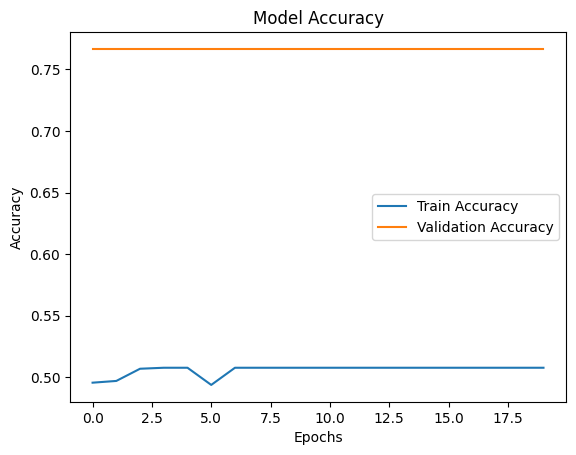

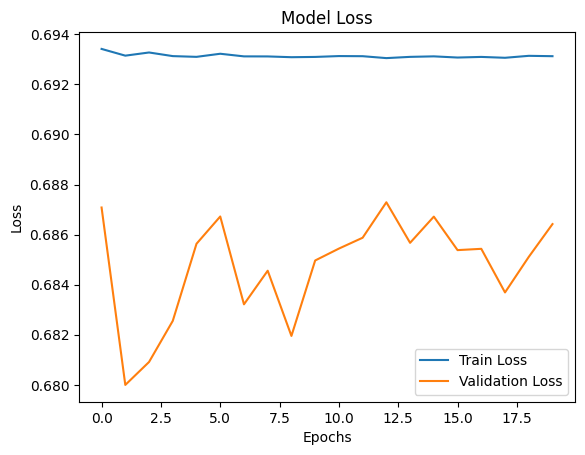

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()